In [1]:
!pip install keras-tuner

In [2]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

2023-08-22 20:26:41.712595: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=2))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [4]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [5]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

INFO:tensorflow:Oracle triggered exit


In [6]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 3,
 'num_layers': 6,
 'units_0': 9,
 'units_1': 7,
 'units_2': 7,
 'units_3': 7,
 'units_4': 1,
 'units_5': 7,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0042'}

In [7]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1426 - accuracy: 0.9960 - 356ms/epoch - 45ms/step
Loss: 0.14258569478988647, Accuracy: 0.9959999918937683


# Jon's Notes

#### Not in school notes

Since this model is a classifier, we are plotting it to see how it looks like on a visualization.

In [8]:
import matplotlib.pyplot as plt

In [9]:
predictions = best_model.predict(X_test_scaled)

8/8 [==============================] - 0s 2ms/step


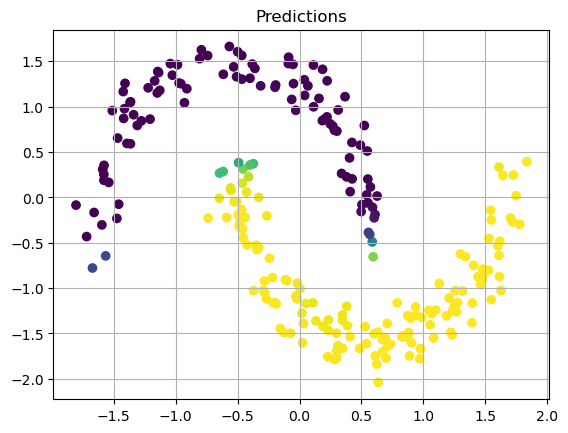

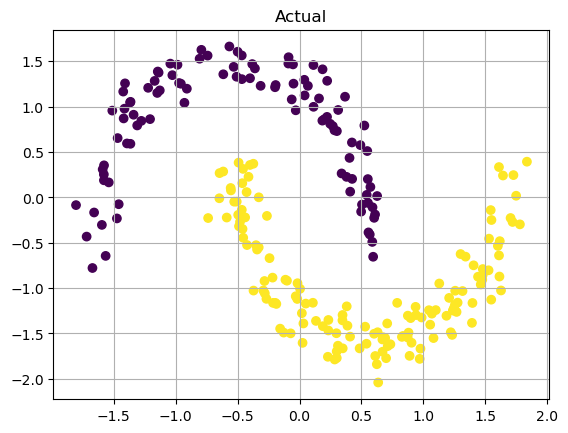

In [10]:
plt.figure("Predictions")
plt.title("Predictions")
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker="o", c=predictions)
plt.grid()

plt.figure("Actual")
plt.title("Actual")
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker="o", c=y_test)
plt.grid()
plt.show()

In [11]:
# Why there is a gradient of colors in the visualization?
predictions

array([[0.10537264],
       [0.8814961 ],
       [0.10558677],
       [0.10562017],
       [0.87950736],
       [0.10657031],
       [0.10555171],
       [0.8727505 ],
       [0.10542011],
       [0.71932936],
       [0.8815979 ],
       [0.88038033],
       [0.6369817 ],
       [0.8677612 ],
       [0.88154304],
       [0.88140464],
       [0.10537951],
       [0.8815165 ],
       [0.10628964],
       [0.8813501 ],
       [0.66239804],
       [0.8810646 ],
       [0.8812606 ],
       [0.10546307],
       [0.10970409],
       [0.86583596],
       [0.11577361],
       [0.8814163 ],
       [0.11221009],
       [0.10807337],
       [0.87645423],
       [0.88120735],
       [0.88156086],
       [0.88050646],
       [0.86807966],
       [0.88062257],
       [0.44902632],
       [0.8810907 ],
       [0.88138205],
       [0.8796581 ],
       [0.88068193],
       [0.10883972],
       [0.10736856],
       [0.87818664],
       [0.88162553],
       [0.8800018 ],
       [0.1078734 ],
       [0.110